# Importing time series

In [10]:
import os
import pandas as pd
import numpy as np

In [11]:
%matplotlib notebook

In [12]:
DATA_DIR = os.path.abspath(os.path.join(
    os.path.abspath(''), "..", "data"
))
fname = "Kust.csv"

In [13]:
df = pd.read_csv(os.path.join(DATA_DIR, fname), sep=";", encoding='latin1')

# Merging date and time

In [14]:
df["DATUM_TIJD"] = df["WAARNEMINGDATUM"] + " " +  df["WAARNEMINGTIJD"]

# Making sure that the types are correct

In [15]:
df["DATETIME"] = pd.to_datetime(df["DATUM_TIJD"], dayfirst=True)

In [16]:
df["VALUE"] = pd.to_numeric(df["NUMERIEKEWAARDE"]).copy()

# First try plotting the data

<IPython.core.display.Javascript object>


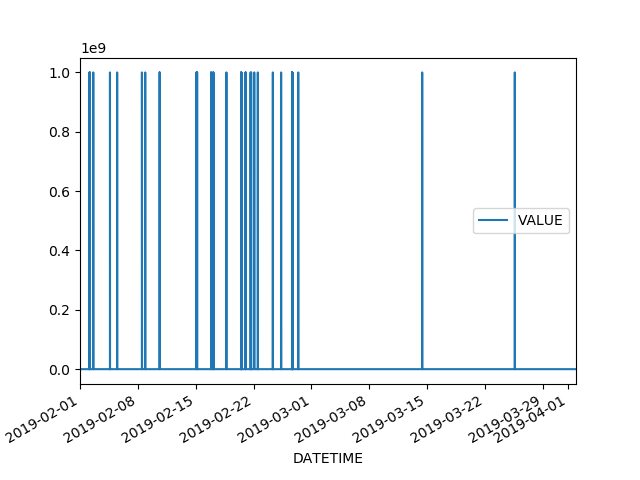

In [17]:
df.plot("DATETIME", "VALUE")

# Filtering out wrong values

In [18]:
df.loc[df["VALUE"] > 600, "VALUE"] = np.nan

# Renaming columns and storing intermediate results

In [19]:
df.rename(columns={"MEETPUNT_IDENTIFICATIE": "LOCATION"}, inplace=True)

In [20]:
df_res = df[["LOCATION", "DATETIME", "VALUE"]]

In [21]:
df_res.to_csv(os.path.join(DATA_DIR, "Filtered_{}".format(fname)), index=None)